In [1]:
!pip install opencv-python

In [2]:
pip install --upgrade numpy opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install mss

In [11]:
# Define the region (left, top, width, height)
region = {'top': 1030, 'left': 700, 'width': 350, 'height': 60}

with mss.mss() as sct:
    screenshot = sct.grab(region)
    mss.tools.to_png(screenshot.rgb, screenshot.size, output='partial_screenshot.png')

In [3]:
!pip install pydirectinput

In [5]:
!pip install pynput

### Use this script to check coordinates of mouse click

In [10]:
from pynput.mouse import Listener

def on_click(x, y, button, pressed):
    if pressed:
        print(f"Mouse clicked at ({x}, {y})")
        return False  # Stops the listener

# Set up the listener
with Listener(on_click=on_click) as listener:
    listener.join()

Mouse clicked at (700, 1031)


### Use this script to take a screenshot and test to see if your region is correct
mss is the library used to take screenshots and save a png picture

In [22]:
import mss

# Define the region (left, top, width, height)
region = {'top': 1035, 'left': 710, 'width': 150, 'height': 13}

with mss.mss() as sct:
    screenshot = sct.grab(region)
    mss.tools.to_png(screenshot.rgb, screenshot.size, output='partial_screenshot.png')


### Testing mss screenshots in a loop

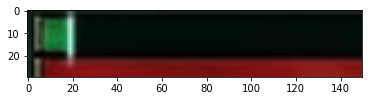

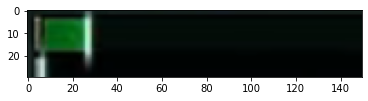

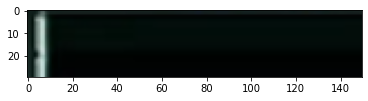

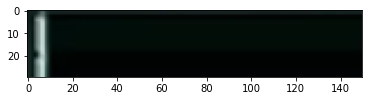

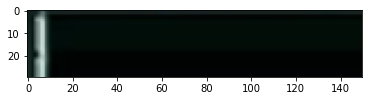

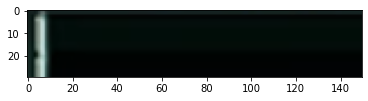

KeyboardInterrupt: 

In [17]:
import mss
import mss.tools
import time
import matplotlib.pyplot as plt
from PIL import Image
import io

# Define the region (left, top, width, height)
region = {'top': 1030, 'left': 700, 'width': 150, 'height': 30}

def take_screenshot():
    with mss.mss() as sct:
        screenshot = sct.grab(region)
        img_bytes = mss.tools.to_png(screenshot.rgb, screenshot.size)
        return Image.open(io.BytesIO(img_bytes))

def display_image(image):
    plt.imshow(image)
    plt.show()

while True:
    img = take_screenshot()
    display_image(img)
    time.sleep(3)  # Wait for 3 seconds before taking another screenshot


### Testing opencv 
Take in the png picture we saved previously, do some image processing and ultimately detect how much black and green areas there is in the picture

In [32]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('partial_screenshot.png')  # Replace with your image path

# Define color ranges in BGR format
black_lower = np.array([0, 0, 0])
black_upper = np.array([50, 50, 50])  # Adjust these values based on your requirement

green_lower = np.array([35, 100, 50])  # Lower boundary for green
green_upper = np.array([85, 255, 255]) # Upper boundary for green

# Convert image to HSV format for better color segmentation
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create masks for black and green colors
black_mask = cv2.inRange(hsv_image, black_lower, black_upper)
green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

black_area = cv2.countNonZero(black_mask)
green_area = cv2.countNonZero(green_mask)
total_area = image.shape[0] * image.shape[1]
black_percentage = (black_area / total_area) * 100
green_percentage = (green_area / total_area) * 100

print(black_percentage, green_percentage)
# Check if there are any black or green regions in the image
if black_percentage > 10:
    print("Image contains black color")
else:
    print("Image does not contain black color")

if green_percentage > 10:
    print("Image contains green color")
else:
    print("Image does not contain green color")


# Optional: Display the masks
cv2.imshow("Black Mask", black_mask)
cv2.imshow("Green Mask", green_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


0.0 98.15384615384616
Image does not contain black color
Image contains green color


# Final Script (mss + pydirectinput + opencv)
- mss is used to take the screenshot continuiously (not sure how fast this is)
- opencv is used to detect the health of tryndamere 
- pydirectinput is used to press 'r'  (set to 20% green_area which translate to roughly 10-15% health in game)

In [ ]:
import mss
import mss.tools
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
import io
import cv2
import numpy as np
import pydirectinput

# Define color ranges in BGR format
black_lower = np.array([0, 0, 0])
black_upper = np.array([50, 50, 50])  # Adjust these values based on your requirement

green_lower = np.array([35, 100, 50])  # Lower boundary for green
green_upper = np.array([85, 255, 255]) # Upper boundary for green

# Define the region (left, top, width, height)
region = {'top': 1035, 'left': 710, 'width': 250, 'height': 13}

count = 0

def take_screenshot():
    with mss.mss() as sct:
        screenshot = sct.grab(region)
        # Convert to a numpy array and drop the alpha channel
        img_np = np.array(screenshot)[:,:,:3]
        return img_np
    
def display_image(image):
    plt.imshow(image)
    plt.show()

# some delay before starting the script and the checks running
time.sleep(5)

while True:
    img_np = take_screenshot()
    # display_image(img_np)

    # Convert image to HSV format for better color segmentation
    hsv_image = cv2.cvtColor(img_np, cv2.COLOR_BGR2HSV)
    # Create masks for black and green colors
    black_mask = cv2.inRange(img_np, black_lower, black_upper)
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)
    # Calculate area of the colors
    black_area = cv2.countNonZero(black_mask)
    green_area = cv2.countNonZero(green_mask)
    total_area = img_np.shape[0] * img_np.shape[1]
    black_percentage = (black_area / total_area) * 100
    green_percentage = (green_area / total_area) * 100
    
    print(round(green_percentage,2))

    if green_percentage < 20:
        count += 1
        print("Press R idiot")
        pydirectinput.press('r')
        # count is used to avoid the program spamming r when the ulti is already on cooldown
        if count > 2:
            time.sleep(10)
            count = 0

    time.sleep(0.01)  # Wait for abit before taking another screenshot
    clear_output(wait=True) # Refresh the print output

70.83


### Find color at mouse location
- this script is just used to find the colors at a mouse location which is useful for debugging and setting the upper and lower boundaries of green/black colors

In [ ]:
import numpy as npr
from pynput import mouse
import mss
rrrrrrrrrrrrrrrr
def on_click(x, y, button, pressed):
    if pressed:
        with mss.mss() as sct:
            # Get one pixel at the mouse position
            monitor = {"top": y, "left": x, "width": 1, "height": 1}
            screenshot = sct.grab(monitor)
            # Convert to numpy array
            img = np.array(screenshot)[:,:,:3]
            # Get pixel color
            pixel_color = img[0, 0]
            print(f"Color at position ({x}, {y}): {pixel_color}")

        return False  # Stop listener

# Start the mouse listener
with mouse.Listener(on_click=on_click) as listener:
    listener.join()
